In [1]:
# Importando a base
import pandas as pd
treino = pd.read_csv('train_2.csv')
teste = pd.read_csv('test_2.csv')
treino.head(3)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,-1,Reg,Lvl,AllPub,...,0,-1,-1,-1,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,-1,Reg,Lvl,AllPub,...,0,-1,-1,-1,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,-1,IR1,Lvl,AllPub,...,0,-1,-1,-1,0,9,2008,WD,Normal,223500


In [2]:
# Podemos verificar novamente as informações dessa base
treino.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          1460 non-null   object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [3]:
# E também a quantidade de colunas de cada tipo
treino.dtypes.value_counts()

object     44
int64      34
float64     3
Name: count, dtype: int64

In [4]:
# Verificando a cardinalidade dos dados
treino.nunique().sort_values(ascending=False).head(10)

Id             1460
LotArea        1073
GrLivArea       861
BsmtUnfSF       780
1stFlrSF        753
TotalBsmtSF     721
SalePrice       663
BsmtFinSF1      637
GarageArea      441
2ndFlrSF        417
dtype: int64

In [5]:
# Visualizando a descrição estatística
treino.SalePrice.describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

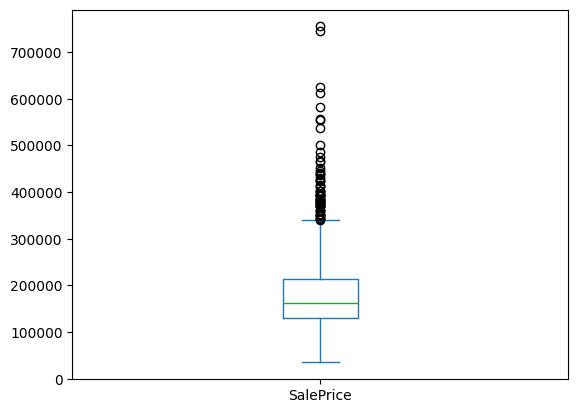

In [6]:
# Visualizando um boxplot
treino.SalePrice.plot.box();

In [7]:
# Verificando a correlação entre os valores
treino.corr(numeric_only=True)['SalePrice'].sort_values()

KitchenAbvGr    -0.135907
EnclosedPorch   -0.128578
MSSubClass      -0.084284
OverallCond     -0.077856
YrSold          -0.028923
LowQualFinSF    -0.025606
Id              -0.021917
MiscVal         -0.021190
BsmtHalfBath    -0.016844
3SsnPorch        0.044584
MoSold           0.046432
PoolArea         0.092404
ScreenPorch      0.111447
BedroomAbvGr     0.168213
BsmtUnfSF        0.214479
BsmtFullBath     0.227122
GarageYrBlt      0.261354
LotArea          0.263843
HalfBath         0.284108
OpenPorchSF      0.315856
2ndFlrSF         0.319334
WoodDeckSF       0.324413
LotFrontage      0.330222
BsmtFinSF1       0.386420
Fireplaces       0.466929
MasVnrArea       0.472614
YearRemodAdd     0.507101
YearBuilt        0.522897
TotRmsAbvGrd     0.533723
FullBath         0.560664
1stFlrSF         0.605852
TotalBsmtSF      0.613581
GarageArea       0.623431
GarageCars       0.640409
GrLivArea        0.708624
OverallQual      0.790982
SalePrice        1.000000
Name: SalePrice, dtype: float64

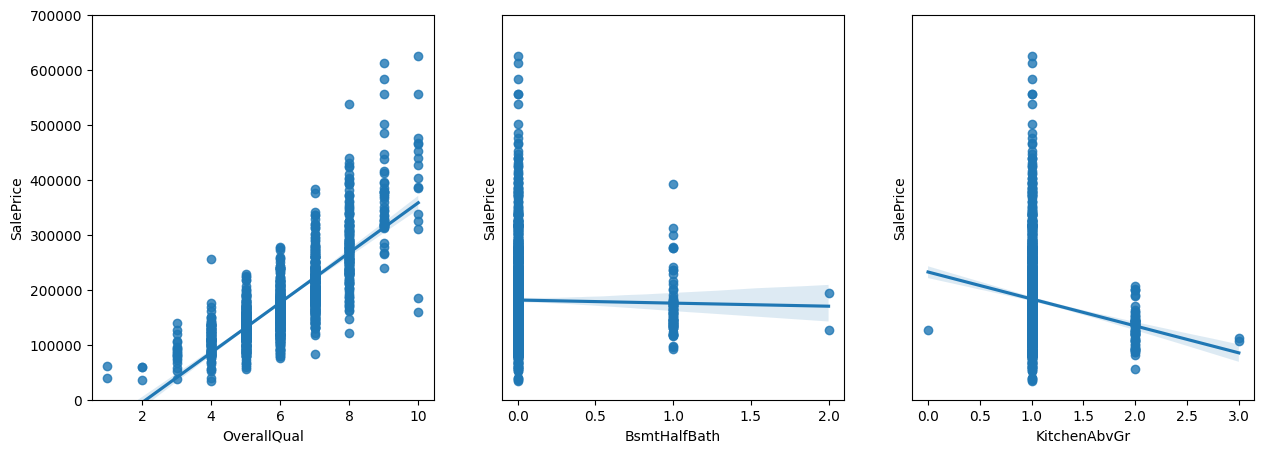

In [8]:
# Criando esse gráfico
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(ncols=3,figsize=(15,5))

sns.regplot(data=treino,x='OverallQual',y='SalePrice',ax=ax[0])
sns.regplot(data=treino,x='BsmtHalfBath',y='SalePrice',ax=ax[1])
sns.regplot(data=treino,x='KitchenAbvGr',y='SalePrice',ax=ax[2])

ax[0].set(ylim=(0,700000))
ax[1].set(ylim=(0,700000),yticks=[])
ax[2].set(ylim=(0,700000),yticks=[])

plt.show()

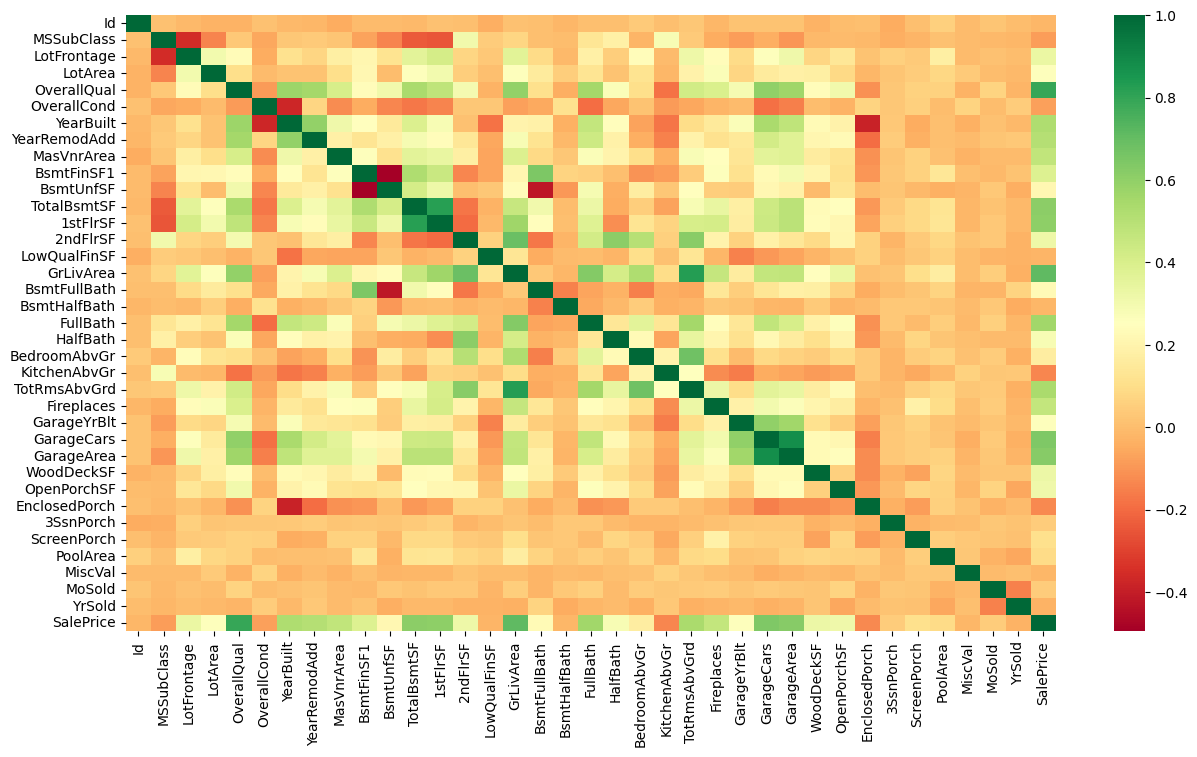

In [9]:
# Criando um mapa de calor da correlação
fig, ax = plt.subplots(figsize=(15,8))

sns.heatmap(treino.corr(numeric_only=True),cmap='RdYlGn')

plt.show()

- **E para as variáveis categóricas, podemos analisar se alguma delas possuem valores recorrentes**
    - Por exemplo, todas as casas "caras" possuem ar condicionado central e as casas "baratas" não

In [10]:
# Selecionando as colunas que vamos trabalhar
obj_cols = treino.columns[treino.dtypes == 'object']
obj_cols

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'BsmtFinSF2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC',
       'Fence', 'MiscFeature', 'SaleType', 'SaleCondition'],
      dtype='object')

In [11]:
# Visualizando as casas mais caras
caras = treino.sort_values('SalePrice').tail(10)
caras = caras[obj_cols]
caras.head(2)

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
798,RL,Pave,-1,Reg,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,...,BuiltIn,Fin,TA,TA,Y,-1,-1,-1,New,Partial
178,RL,Pave,-1,IR1,Lvl,AllPub,CulDSac,Gtl,StoneBr,Norm,...,Attchd,Fin,TA,TA,Y,-1,-1,-1,New,Partial


In [12]:
# E também as casas mais baratas
baratas = treino.sort_values('SalePrice').head(10)
baratas = baratas[obj_cols]
baratas.head(2)

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
495,C (all),Pave,-1,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Norm,...,-1,-1,-1,-1,N,-1,GdWo,-1,WD,Abnorml
916,C (all),Pave,-1,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Norm,...,Detchd,Unf,TA,TA,Y,-1,-1,-1,WD,Abnorml


In [13]:
# Verificando, das casas caras, valores que muito se repetem (muitos valores iguais)
caras_val = caras.nunique()
caras_val.head(2)

MSZoning    1
Street      1
dtype: int64

In [14]:
# Verificando agora para as casas mais baratas
baratas_val = baratas.nunique()
baratas_val.head(2)

MSZoning    3
Street      2
dtype: int64

In [15]:
# Podemos unir esses valores
rep = pd.concat([caras_val,baratas_val],axis=1).sort_values([0,1]).head(10)
rep

,0,1
Utilities,1,1
Condition2,1,1
Street,1,2
Condition1,1,2
BldgType,1,2
Heating,1,2
CentralAir,1,2
GarageQual,1,2
PavedDrive,1,2
MSZoning,1,3


In [16]:
# Agora visualizando essas colunas para as casas mais caras
caras[rep.index]

,Utilities,Condition2,Street,Condition1,BldgType,Heating,CentralAir,GarageQual,PavedDrive,MSZoning
798,AllPub,Norm,Pave,Norm,1Fam,GasA,Y,TA,Y,RL
178,AllPub,Norm,Pave,Norm,1Fam,GasA,Y,TA,Y,RL
769,AllPub,Norm,Pave,Norm,1Fam,GasA,Y,TA,Y,RL
440,AllPub,Norm,Pave,Norm,1Fam,GasA,Y,TA,Y,RL
1046,AllPub,Norm,Pave,Norm,1Fam,GasA,Y,TA,Y,RL
803,AllPub,Norm,Pave,Norm,1Fam,GasA,Y,TA,Y,RL
898,AllPub,Norm,Pave,Norm,1Fam,GasA,Y,TA,Y,RL
1169,AllPub,Norm,Pave,Norm,1Fam,GasA,Y,TA,Y,RL
1182,AllPub,Norm,Pave,Norm,1Fam,GasA,Y,TA,Y,RL
691,AllPub,Norm,Pave,Norm,1Fam,GasA,Y,TA,Y,RL


In [17]:
# E para as mais baratas
baratas[rep.index]

,Utilities,Condition2,Street,Condition1,BldgType,Heating,CentralAir,GarageQual,PavedDrive,MSZoning
495,AllPub,Norm,Pave,Norm,1Fam,GasA,N,-1,N,C (all)
916,AllPub,Norm,Pave,Norm,1Fam,GasA,N,TA,Y,C (all)
968,AllPub,Norm,Pave,Norm,1Fam,Grav,N,-1,Y,RM
533,AllPub,Norm,Pave,Norm,1Fam,GasA,N,-1,N,RL
30,AllPub,Norm,Pave,Feedr,1Fam,GasA,N,TA,N,C (all)
710,AllPub,Norm,Pave,Norm,1Fam,GasA,Y,-1,N,RL
1337,AllPub,Norm,Pave,Feedr,1Fam,Grav,N,-1,N,RM
705,AllPub,Norm,Pave,Norm,2fmCon,GasA,N,-1,N,RM
1325,AllPub,Norm,Pave,Norm,1Fam,GasA,N,-1,N,RM
812,AllPub,Norm,Grvl,Norm,1Fam,GasA,N,TA,N,C (all)


<a id="colunas"></a>
## Agora podemos investigar melhor essas principais colunas
- **Index:**
    - [Utilities](#Utilities)
    - [CentralAir](#CentralAir)
    - [PavedDrive](#PavedDrive)
    - [MSZoning](#MSZoning)
    - [GarageQual](#GarageQual)

In [18]:
# Verificando os valores nessa coluna para a base de treino
treino.Utilities.value_counts()

Utilities
AllPub    1459
NoSeWa       1
Name: count, dtype: int64

In [19]:
# E para a base de teste
teste.Utilities.value_counts()

Utilities
AllPub    1459
Name: count, dtype: int64

In [20]:
# Eliminando essa coluna nas 2 bases
treino = treino.drop('Utilities',axis=1)
teste = teste.drop('Utilities',axis=1)

<a id="CentralAir"></a>
- <font color="blue">**Analisando a coluna "CentralAir"**</font>